# Parkinson's Disease Data Analysis and Preprocessing

This notebook performs Exploratory Data Analysis (EDA) and preprocessing on the UCI Parkinson's Disease dataset. The goal is to clean and prepare the data for machine learning modeling.

The steps include:
1.  **Data Loading and Initial Exploration**: Loading the dataset and examining its structure.
2.  **Data Cleaning**: Checking for missing values.
3.  **Exploratory Data Analysis (EDA)**:
    *   Univariate analysis to understand feature distributions.
    *   Bivariate analysis to explore relationships between features and the target variable.
4.  **Feature Scaling**: Standardizing features to have a mean of 0 and a standard deviation of 1.
5.  **Outlier Detection and Handling**: Identifying and removing outliers using the Isolation Forest algorithm.
6.  **Handling Class Imbalance**: Addressing the imbalance in the target variable using manual oversampling.
7.  **Dimensionality Reduction**: Applying Principal Component Analysis (PCA) to reduce the number of features.

In [ ]:
# Import necessary libraries for data manipulation, visualization, and preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

# Fetch the Parkinson's dataset from the UCI repository
parkinsons = fetch_ucirepo(id=174)

# Separate features (X) and target (y)
X = parkinsons.data.features
y = parkinsons.data.targets

# Combine features and target into a single DataFrame for easier analysis
df = pd.concat([X, y], axis=1)

# Display the first 5 rows to inspect the data
print("First 5 rows of the dataset:")
print(df.head())

# Display a concise summary of the DataFrame, including data types and non-null values
print("\nDataset Info:")
df.info()

# Generate descriptive statistics to summarize the central tendency, dispersion, and shape of the dataset's distribution
print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the dataset:
   MDVP:Fo  MDVP:Fhi  MDVP:Flo  MDVP:Jitter  MDVP:Jitter  MDVP:RAP  MDVP:PPQ  \
0  119.992   157.302    74.997      0.00784      0.00784   0.00370   0.00554   
1  122.400   148.650   113.819      0.00968      0.00968   0.00465   0.00696   
2  116.682   131.111   111.555      0.01050      0.01050   0.00544   0.00781   
3  116.676   137.871   111.366      0.00997      0.00997   0.00502   0.00698   
4  116.014   141.781   110.655      0.01284      0.01284   0.00655   0.00908   

   Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer  ...  Shimmer:DDA      NHR     HNR  \
0     0.01109       0.04374       0.04374  ...      0.06545  0.02211  21.033   
1     0.01394       0.06134       0.06134  ...      0.09403  0.01929  19.085   
2     0.01633       0.05233       0.05233  ...      0.08270  0.01309  20.651   
3     0.01505       0.05492       0.05492  ...      0.08771  0.01353  20.644   
4     0.01966       0.06425       0.06425  ...      0.10470  0.01767  19.649   

       RP

### 1. Data Loading and Initial Exploration

First, we load the necessary libraries and fetch the Parkinson's dataset from the UCI machine learning repository. We then combine the features and target variable into a single DataFrame for easier manipulation. Finally, we display the first few rows, basic information, and descriptive statistics to get an initial understanding of the data.

In [2]:
%pip install ucimlrepo

The `ucimlrepo` library is used to fetch datasets from the UCI Machine Learning Repository. The following cell ensures it is installed.

In [4]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
MDVP:Fo         0
MDVP:Fhi        0
MDVP:Flo        0
MDVP:Jitter     0
MDVP:Jitter     0
MDVP:RAP        0
MDVP:PPQ        0
Jitter:DDP      0
MDVP:Shimmer    0
MDVP:Shimmer    0
Shimmer:APQ3    0
Shimmer:APQ5    0
MDVP:APQ        0
Shimmer:DDA     0
NHR             0
HNR             0
RPDE            0
DFA             0
spread1         0
spread2         0
D2              0
PPE             0
status          0
dtype: int64


### 2. Data Cleaning

We check for any missing values in the dataset. Fortunately, this dataset is clean and has no missing values.

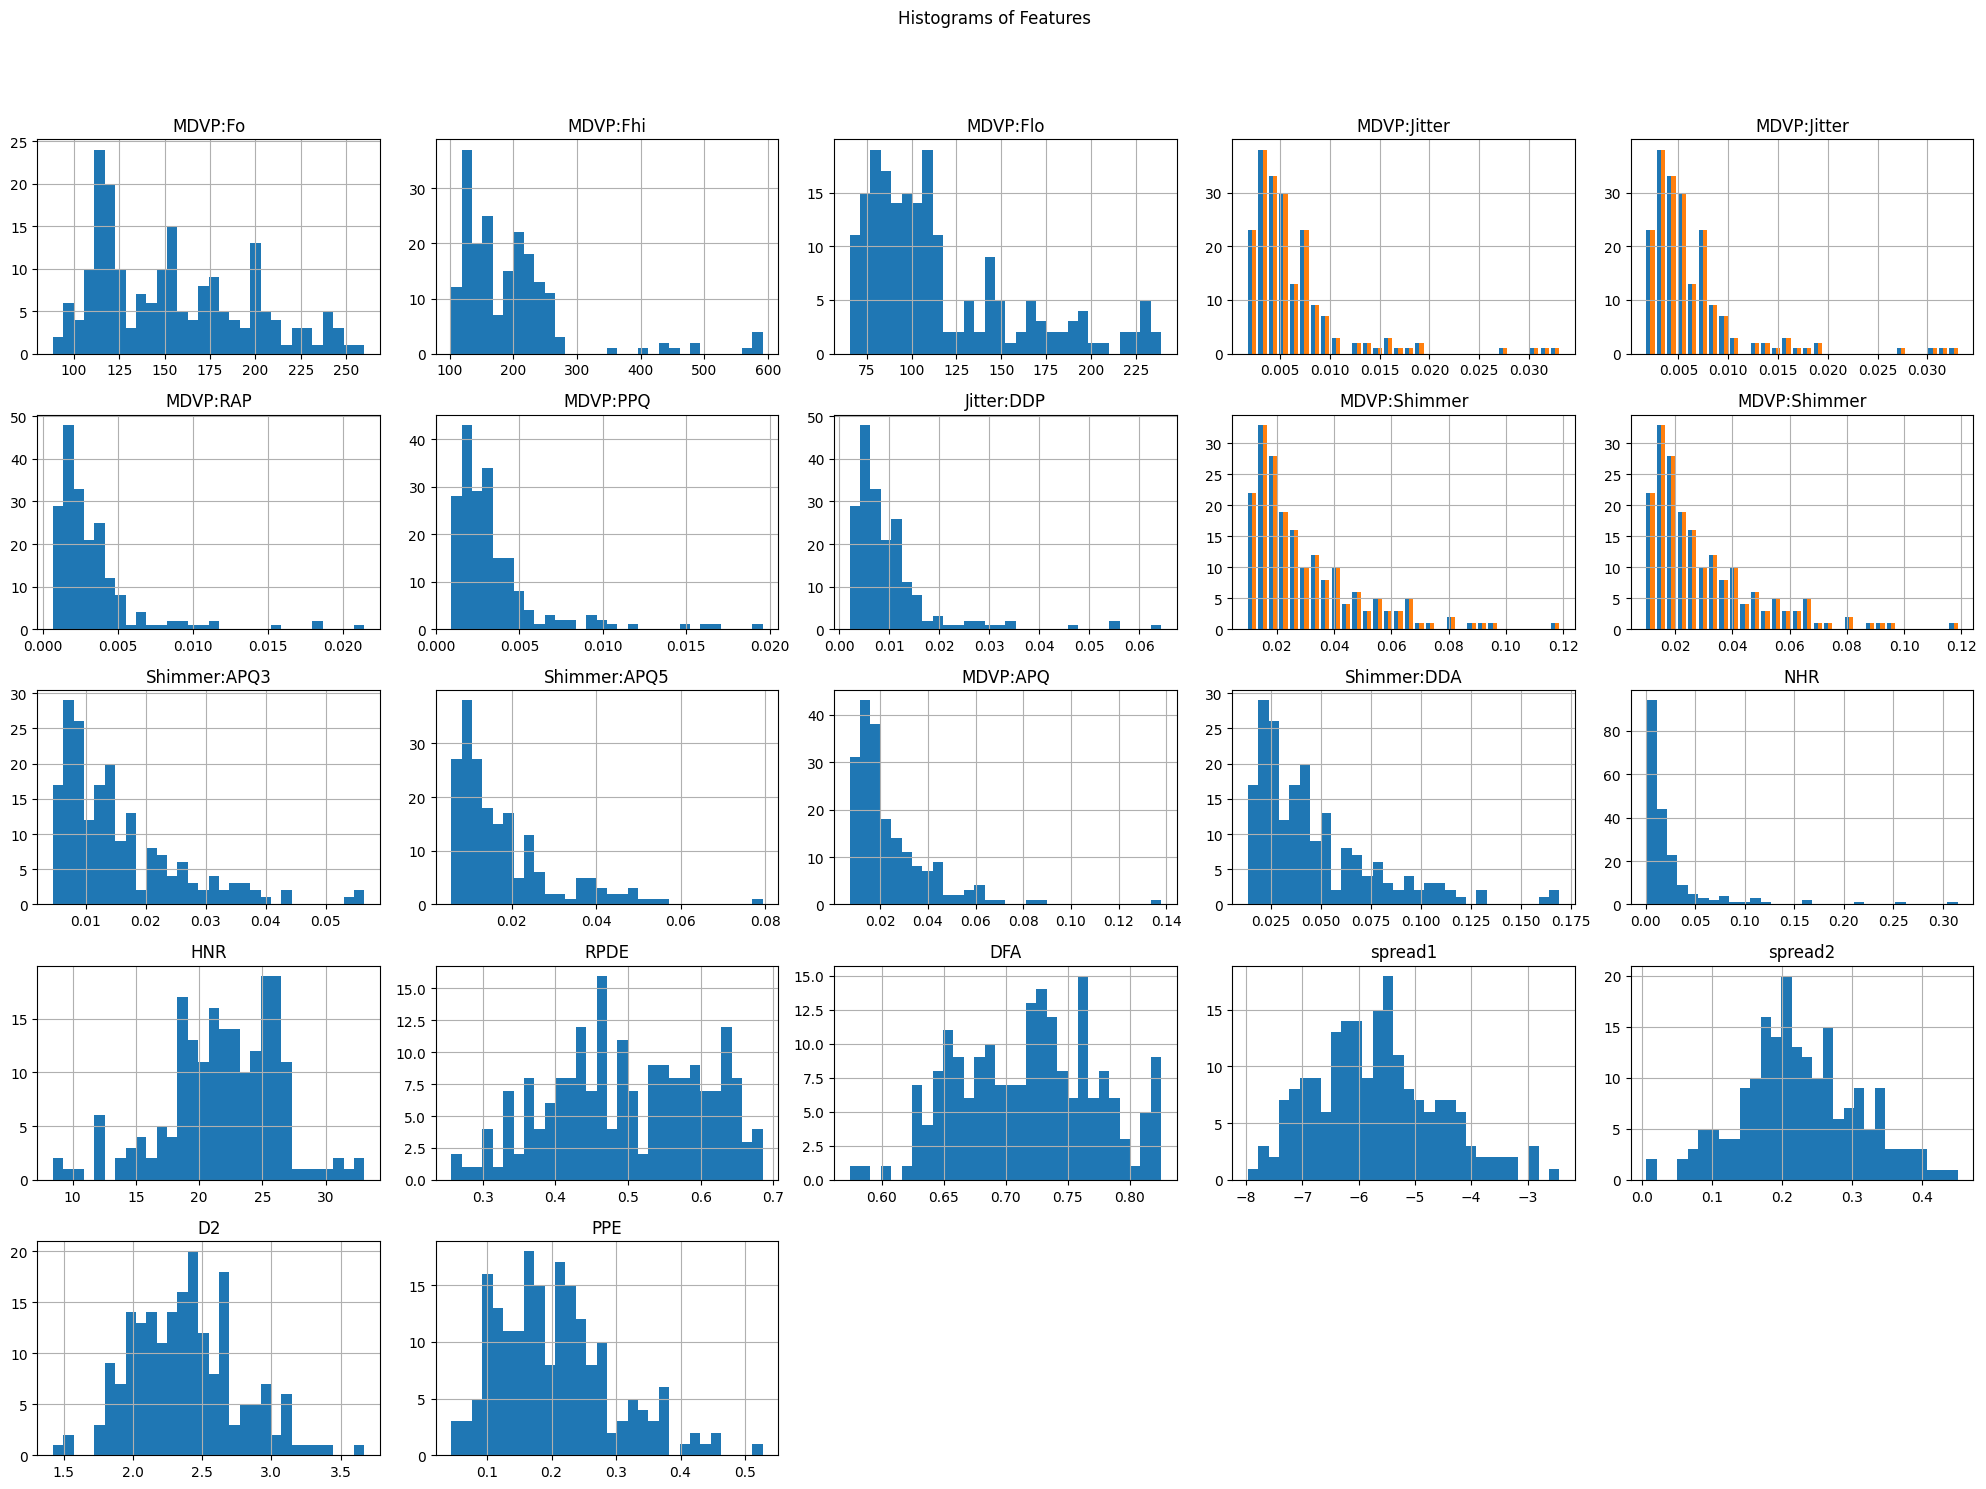

/tmp/ipython-input-645328150.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y.iloc[:, 0], palette='viridis')


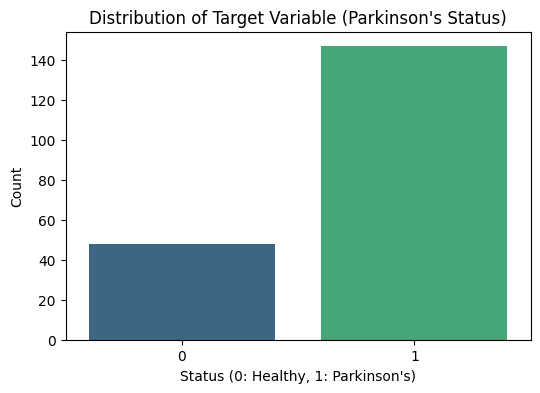

/tmp/ipython-input-645328150.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col_name, y=feature, data=df, palette='viridis')
/tmp/ipython-input-645328150.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col_name, y=feature, data=df, palette='viridis')


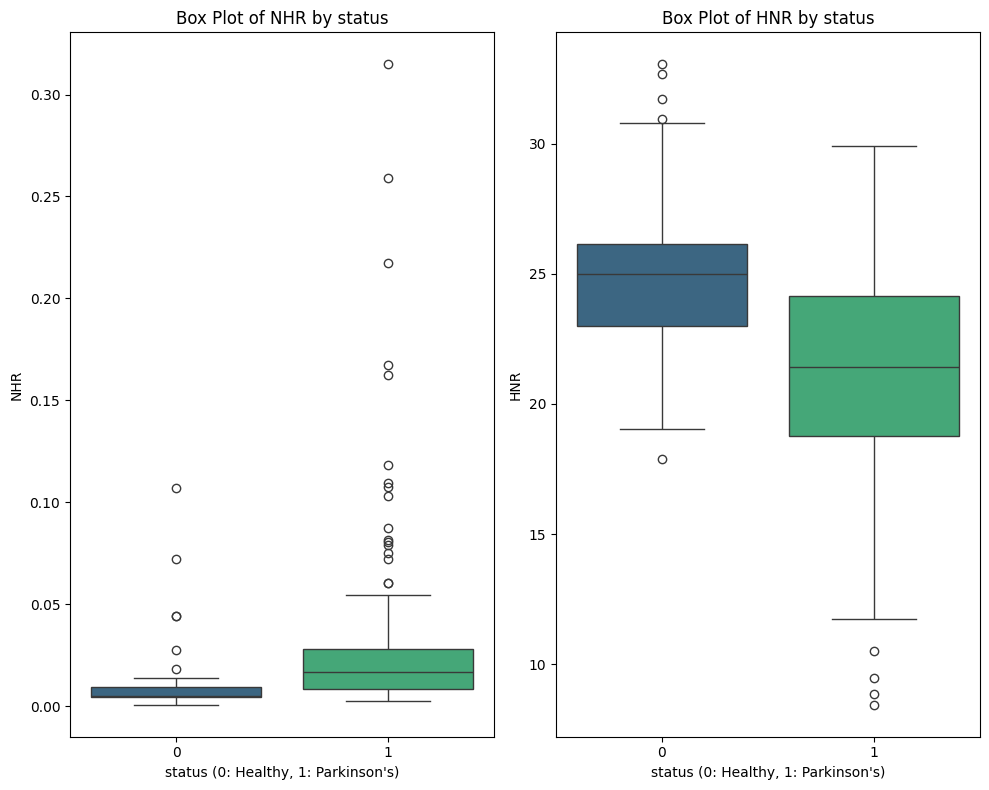

In [ ]:
# Plotting histograms for each numerical feature to visualize their distributions
X.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms of Features", y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

# Plotting the distribution of the target variable to check for class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=y.iloc[:, 0], palette='viridis')
plt.title("Distribution of Target Variable (Parkinson's Status)")
plt.xlabel("Status (0: Healthy, 1: Parkinson's)")
plt.ylabel("Count")
plt.show()

# Using box plots to visualize the distribution of key features for each target class
target_col_name = y.columns[0]
features_to_boxplot = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'Jitter(%)', 'Shimmer', 'NHR', 'HNR']
features_to_boxplot = [f for f in features_to_boxplot if f in df.columns]

plt.figure(figsize=(10, 8))
for i, feature in enumerate(features_to_boxplot):
    plt.subplot(len(features_to_boxplot) // 2 + (len(features_to_boxplot) % 2 > 0), 2, i + 1)
    sns.boxplot(x=target_col_name, y=feature, data=df, palette='viridis')
    plt.title(f'Box Plot of {feature} by {target_col_name}')
    plt.xlabel(f'{target_col_name} (0: Healthy, 1: Parkinson\'s)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### 3. Exploratory Data Analysis (EDA)

#### Univariate Analysis
We start by analyzing individual features. Histograms are plotted for all numerical features to understand their distributions. A count plot is used to visualize the distribution of the target variable (Parkinson's status). Box plots are also used to show the distribution of key features for both healthy individuals and those with Parkinson's.

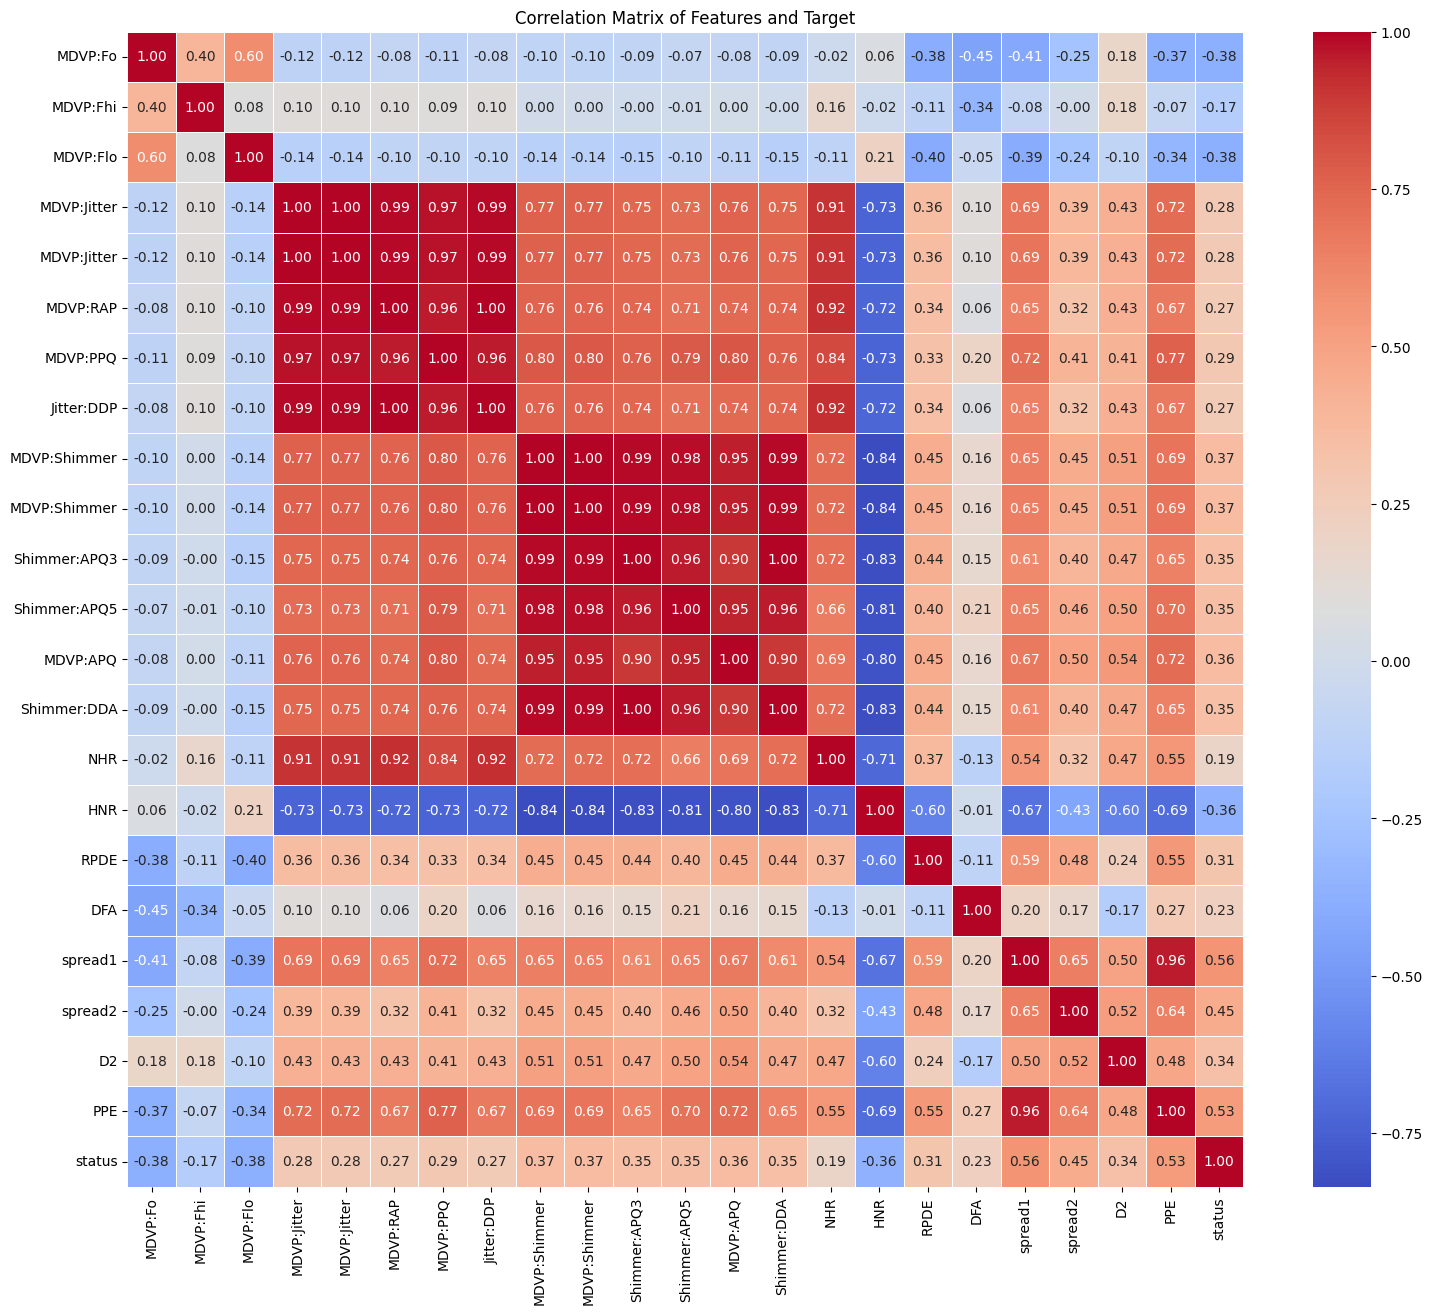


Correlations with the target variable ('status'):
status          1.000000
spread1         0.564838
PPE             0.531039
spread2         0.454842
MDVP:Shimmer    0.367430
MDVP:Shimmer    0.367430
MDVP:APQ        0.364316
Shimmer:APQ5    0.351148
Shimmer:APQ3    0.347617
Shimmer:DDA     0.347608
D2              0.340232
RPDE            0.308567
MDVP:PPQ        0.288698
MDVP:Jitter     0.278220
MDVP:Jitter     0.278220
MDVP:RAP        0.266668
Jitter:DDP      0.266646
DFA             0.231739
NHR             0.189429
MDVP:Fhi       -0.166136
HNR            -0.361515
MDVP:Flo       -0.380200
MDVP:Fo        -0.383535
Name: status, dtype: float64

Key Outcomes from Correlation Heatmap:
  - Features with strongest positive correlation to 'status':
status          1.000000
spread1         0.564838
PPE             0.531039
spread2         0.454842
MDVP:Shimmer    0.367430
Name: status, dtype: float64
  - Features with strongest negative correlation to 'status':
NHR         0.189429
MDVP:F

/tmp/ipython-input-1662740914.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_target.index, y=correlations_with_target.values, palette='viridis')


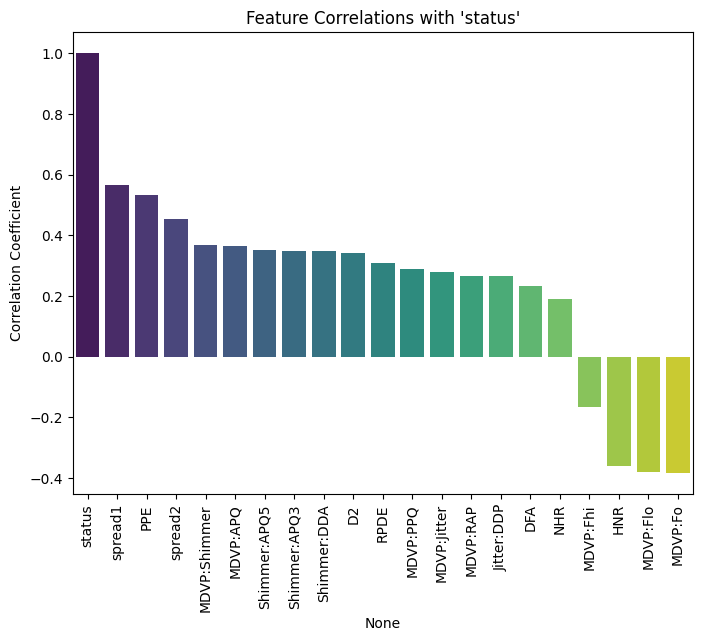

In [ ]:
# Calculate the correlation matrix to understand relationships between variables
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap for better visualization
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Features and Target")
plt.show()

# Extract and sort correlations with the target variable
target_col_name = y.columns[0]
correlations_with_target = correlation_matrix[target_col_name].sort_values(ascending=False)
print(f"\nCorrelations with the target variable ('{target_col_name}'):")
print(correlations_with_target)

# Print the most and least correlated features with the target
print("\nKey Outcomes from Correlation Heatmap:")
print(f"  - Features with strongest positive correlation to '{target_col_name}':")
print(correlations_with_target.head(5)) # Top 5 positive
print(f"  - Features with strongest negative correlation to '{target_col_name}':")
print(correlations_with_target.tail(5)) # Top 5 negative

# Plot a bar chart of feature correlations with the target
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations_with_target.index, y=correlations_with_target.values, palette='viridis')
plt.xticks(rotation=90)
plt.title(f"Feature Correlations with '{target_col_name}'")
plt.ylabel("Correlation Coefficient")
plt.show()

#### Bivariate Analysis

We analyze the relationships between pairs of features, and between features and the target variable. A correlation matrix heatmap is used to visualize the correlations between all variables. We also identify and display the features with the strongest positive and negative correlations with the target variable.

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first 5 rows of the scaled features
print("\nFirst 5 rows of scaled features:")
print(X_scaled_df.head())

# Verify the scaling by checking the mean and standard deviation
print("\nMean of scaled features (should be close to 0):")
print(X_scaled_df.mean())
print("\nStandard deviation of scaled features (should be close to 1):")
print(X_scaled_df.std())


First 5 rows of scaled features:
    MDVP:Fo  MDVP:Fhi  MDVP:Flo  MDVP:Jitter  MDVP:Jitter  MDVP:RAP  MDVP:PPQ  \
0 -0.829300 -0.436165 -0.952037     0.334914     0.334914  0.132963  0.760800   
1 -0.770972 -0.530974 -0.057721     0.715418     0.715418  0.453892  1.276809   
2 -0.909476 -0.723168 -0.109875     0.884991     0.884991  0.720770  1.585687   
3 -0.909622 -0.649092 -0.114229     0.775389     0.775389  0.578885  1.284076   
4 -0.925657 -0.606245 -0.130608     1.368893     1.368893  1.095750  2.047187   

   Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer  ...  MDVP:APQ  Shimmer:DDA  \
0    0.131755      0.745985      0.745985  ...  0.332985     0.607532   
1    0.452684      1.681731      1.681731  ...  1.159454     1.548254   
2    0.721813      1.202693      1.202693  ...  0.699187     1.175323   
3    0.577677      1.340396      1.340396  ...  0.806859     1.340229   
4    1.096793      1.836448      1.836448  ...  1.216839     1.899461   

        NHR       HNR      RPDE       DF

### 4. Feature Scaling

Machine learning algorithms often perform better when numerical features are on a similar scale. We use `StandardScaler` to scale the features to have a mean of 0 and a standard deviation of 1. This is an important step before performing outlier detection and PCA.

In [ ]:
from sklearn.ensemble import IsolationForest

# Use Isolation Forest to detect outliers
# The contamination parameter is the expected proportion of outliers in the data
iso_forest = IsolationForest(random_state=42, contamination=0.05)
outlier_predictions = iso_forest.fit_predict(X_scaled_df) # -1 for outliers, 1 for inliers

# Add outlier status to a temporary DataFrame for visualization
X_plot_outliers = X_scaled_df.copy()
X_plot_outliers['outlier_status'] = np.where(outlier_predictions == -1, 'Outlier', 'Inlier')

num_outliers = (outlier_predictions == -1).sum()
print(f"Number of outliers detected by Isolation Forest: {num_outliers}")

# Visualize outliers using a scatter plot of two relevant features
feature1_name = 'MDVP:Fo(Hz)'
feature2_name = 'Jitter(%)'

if feature1_name in X_plot_outliers.columns and feature2_name in X_plot_outliers.columns:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x=feature1_name,
        y=feature2_name,
        hue='outlier_status',
        data=X_plot_outliers,
        palette={'Inlier': 'blue', 'Outlier': 'red'},
        alpha=0.7
    )
    plt.title(f'Outliers detected by Isolation Forest ({feature1_name} vs {feature2_name})')
    plt.xlabel(f'{feature1_name} (Scaled)')
    plt.ylabel(f'{feature2_name} (Scaled)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
else:
    print(f"Warning: '{feature1_name}' or '{feature2_name}' not found in scaled features. Skipping outlier plot.")

# Remove outliers from the features and target variable
X_no_outliers = X_scaled_df[outlier_predictions == 1]
y_no_outliers = y[outlier_predictions == 1].copy()

print(f"Shape of features after removing outliers: {X_no_outliers.shape}")
print(f"Shape of target after removing outliers: {y_no_outliers.shape}")
print("Target distribution after outlier removal:\n", y_no_outliers.iloc[:, 0].value_counts())


--- Outlier Detection and Handling ---
Number of outliers detected by Isolation Forest: 10
Available columns: ['MDVP:Fo', 'MDVP:Fhi', 'MDVP:Flo', 'MDVP:Jitter', 'MDVP:Jitter', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'outlier_status']
Shape of features after removing outliers: (185, 22)
Shape of target after removing outliers: (185, 1)
Target distribution after outlier removal:
 status
1    137
0     48
Name: count, dtype: int64


### 5. Outlier Detection and Handling

Outliers can skew the results of machine learning models. We use the `IsolationForest` algorithm to detect outliers in the scaled feature set. The detected outliers are then visualized and removed from the dataset.


--- Handling Class Imbalance (Manual Oversampling) ---

Original target distribution before oversampling:
status
1    137
0     48
Name: count, dtype: int64
Majority class (0) count: 48
Minority class (1) count: 137

Target distribution after manual oversampling:
status
1    137
0     48
Name: count, dtype: int64


/tmp/ipython-input-3517499044.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='viridis')


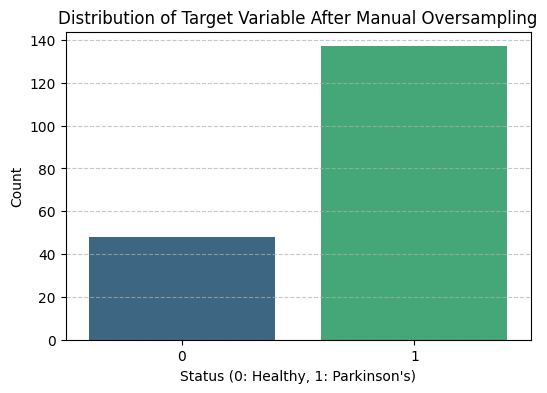

In [ ]:
# Extract the target series from the DataFrame
y_target_series = y_no_outliers.iloc[:, 0]

print("\nOriginal target distribution before oversampling:")
print(y_target_series.value_counts())

# Combine features and target for easier filtering
df_temp = pd.concat([X_no_outliers, y_target_series], axis=1)

# Separate majority and minority classes
majority_class = df_temp[df_temp[y_target_series.name] == 0]
minority_class = df_temp[df_temp[y_target_series.name] == 1]

print(f"Majority class (0) count: {len(majority_class)}")
print(f"Minority class (1) count: {len(minority_class)}")

# Oversample the minority class by duplicating random samples
n_samples_to_add = len(majority_class) - len(minority_class)
if n_samples_to_add > 0:
    minority_oversampled = minority_class.sample(n=n_samples_to_add, replace=True, random_state=42)
    df_balanced = pd.concat([majority_class, minority_class, minority_oversampled], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
else:
    df_balanced = df_temp.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate the resampled features and target
X_resampled = df_balanced.drop(columns=[y_target_series.name])
y_resampled = df_balanced[y_target_series.name]

print("\nTarget distribution after manual oversampling:")
print(y_resampled.value_counts())

# Visualize the balanced target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, palette='viridis')
plt.title("Distribution of Target Variable After Manual Oversampling")
plt.xlabel("Status (0: Healthy, 1: Parkinson's)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 6. Handling Class Imbalance

The target variable is imbalanced, with more samples for one class than the other. This can lead to a biased model. We address this by manually oversampling the minority class to balance the dataset.


--- Principal Component Analysis (PCA) ---

Number of components selected by PCA: 9
Total variance explained by selected components: 0.9654

First 5 rows of features after PCA:
       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0  3.104705  1.148730 -0.969940  0.788250  0.628950  1.290611  0.377711   
1 -3.619967  2.649235  1.383954 -0.273882  0.470325  0.668889 -0.152457   
2 -4.009814  2.006544  0.603947 -0.091841  0.044466  1.405146  0.973164   
3  0.110481  1.095711 -2.851830 -2.297459  1.402231 -1.619546  0.706831   
4  2.114795  0.568495 -1.863919 -0.861239 -0.333210  1.291386 -0.807228   

       PC_8      PC_9  
0 -0.253932  0.205957  
1 -0.407095  0.156887  
2  0.038861 -0.831835  
3 -0.306606 -0.179416  
4  0.519648 -0.249519  


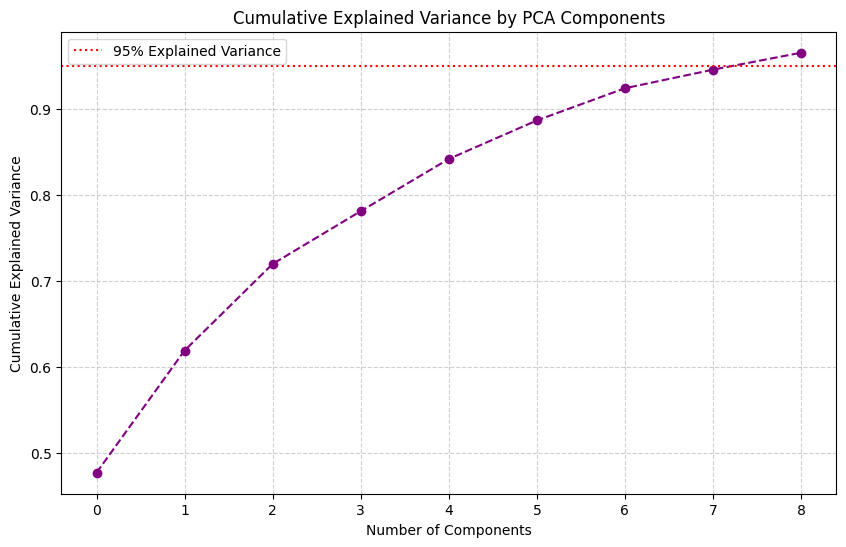

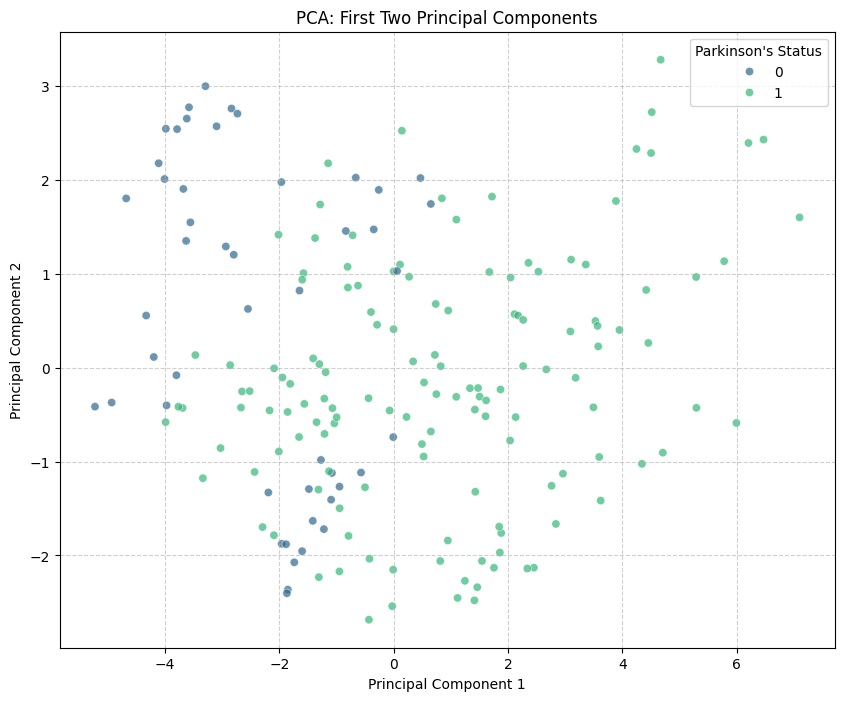


--- Data Preprocessing Steps (Outlier, Imbalance, PCA) Completed ---
Final feature set shape (after PCA): (185, 9)
Final target set shape (after manual oversampling): (185,)


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to the resampled data, aiming to retain 95% of the variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_resampled)

print(f"\nNumber of components selected by PCA: {pca.n_components_}")
print(f"Total variance explained by selected components: {np.sum(pca.explained_variance_ratio_):.4f}")

# Convert PCA results to a DataFrame for easier handling
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC_{i+1}' for i in range(pca.n_components_)])
print("\nFirst 5 rows of features after PCA:")
print(X_pca_df.head())

# Plot the cumulative explained variance to visualize how much information is retained
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='purple')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=0.95, color='r', linestyle=':', label='95% Explained Variance')
plt.legend()
plt.show()

# Plot the first two principal components if available
if pca.n_components_ >= 2:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='PC_1',
        y='PC_2',
        hue=y_resampled,
        data=X_pca_df,
        palette='viridis',
        alpha=0.7
    )
    plt.title('PCA: First Two Principal Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Parkinson\'s Status')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
else:
    print("\nLess than 2 principal components were selected, cannot plot 2D scatter of PCs.")

print("\n--- Data Preprocessing Steps Completed ---")
print("Final feature set shape (after PCA):", X_pca_df.shape)
print("Final target set shape (after manual oversampling):", y_resampled.shape)

### 7. Dimensionality Reduction with PCA

To reduce the number of features and potentially improve model performance, we apply Principal Component Analysis (PCA). We configure PCA to retain 95% of the variance in the data. The number of components selected and the total explained variance are printed. We also visualize the cumulative explained variance and plot the first two principal components.